# MEDICAL INSURANCE COST PREDICTION

# Data Loading

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import random

In [2]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# checking the datatypes
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
# statistical analysis
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
print(f'Number of instances present in the dataset : {df.shape[0]}')
print(f"Number of attributes present in the dataset : {df.shape[1]}")

Number of instances present in the dataset : 1338
Number of attributes present in the dataset : 7


# Data Preprocessing

In [6]:
# Checking the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Converting or splitting the dataset into features(X) and labels(y)

X = df.drop(['charges'], axis=1)
y = df['charges']

print(f"Features : \n{X.head()}")
print(f"\nLabels : \n{y.head()}")

Features : 
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest

Labels : 
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [8]:
# Performing one-hot encoding for the categorical features
# Since the categorical features present in the dataset are nominal, it is better to perform one-hot encoding rather than label encoding
X= pd.get_dummies(X)
X.head(), X.shape

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0        True     False      False        True   
 1   18  33.770         1       False      True       True       False   
 2   28  33.000         3       False      True       True       False   
 3   33  22.705         0       False      True       True       False   
 4   32  28.880         0       False      True       True       False   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0             False             False             False              True  
 1             False             False              True             False  
 2             False             False              True             False  
 3             False              True             False             False  
 4             False              True             False             False  ,
 (1338, 11))

In [9]:
# Performing Normalization (Min-max scaling) on the numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled , X_scaled.shape

(array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.        , 0.47914985, 0.2       , ..., 0.        , 1.        ,
         0.        ],
        [0.2173913 , 0.45843422, 0.6       , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.06521739, 0.26472962, 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.93478261, 0.35270379, 0.        , ..., 1.        , 0.        ,
         0.        ]]),
 (1338, 11))

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled , y , test_size=0.2 , random_state=42)

In [11]:
y_train = y_train.values 
y_test = y_test.values

In [12]:
X_train

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [13]:
X_test

array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.84611246, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.49071832, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

In [14]:
y_train

array([ 9193.8385 ,  8534.6718 , 27117.99378, ..., 11931.12525,
       46113.511  , 10214.636  ])

In [15]:
y_test

array([ 9095.06825 ,  5272.1758  , 29330.98315 ,  9301.89355 ,
       33750.2918  ,  4536.259   ,  2117.33885 , 14210.53595 ,
        3732.6251  , 10264.4421  , 18259.216   ,  7256.7231  ,
        3947.4131  , 46151.1245  , 48673.5588  , 44202.6536  ,
        9800.8882  , 42969.8527  ,  8233.0975  , 21774.32215 ,
        5080.096   ,  7441.501   ,  1256.299   ,  2755.02095 ,
       11085.5868  , 10923.9332  , 12644.589   , 18804.7524  ,
        9715.841   ,  1131.5066  , 15828.82173 , 11842.62375 ,
        2020.5523  ,  5693.4305  ,  2904.088   ,  7448.40395 ,
        2597.779   ,  7337.748   , 23887.6627  , 38709.176   ,
        4687.797   ,  2643.2685  , 11674.13    , 12124.9924  ,
        4889.9995  , 12333.828   ,  3579.8287  ,  4391.652   ,
       42124.5153  ,  4463.2051  , 13887.204   ,  1719.4363  ,
       28476.73499 ,  1708.92575 , 10594.2257  , 25333.33284 ,
        3645.0894  , 38746.3551  , 11848.141   , 10564.8845  ,
       13880.949   ,  4753.6368  , 27941.28758 ,  8017.

In [16]:
X_train.shape , y_train.shape

((1070, 11), (1070,))

In [17]:
X_test.shape , y_test.shape

((268, 11), (268,))

#### Creating a helper function to evaluate the models (from sklearn) on the basis of :
#### 1. Mean Absolute Error (MAE)
#### 2. R2 Score
#### 3. Residual Distribution plot

In [18]:
def evaluate_model(model,X_test,y_test):
    """Picks any random data(cost) from the given y_test,
    and displays the corroesponding cost prediction made by the model(from sklearn)
    
    and,
    
    Evaluates the model on the basis of:
    1.Mean Absolute Error (MAE)
    2.R2 Score
    3.Residual Distribution plot (KDE plot)
    
    input: Model, test features and test labels"""
    y_pred = model.predict(X_test)
    random_index = random.randint(0,y_pred.size)
    print(f"Actual Cost : $ {y_test[random_index]:.2f}")
    print(f"Predicted Cost : $ {y_pred[random_index]:.2f}")
    mae = mean_absolute_error(y_test,y_pred)
    print("\n")
    print(f"Mean Absolute Error : $ {mae:.2f}")
    r2 = r2_score(y_test,y_pred)
    print(f'R2 Score : {r2:.2f}')
    print("\n")
    residual = y_test - y_pred
    sns.kdeplot(residual,fill=True)
    plt.title('Residual Distribution Plot')
    

# Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train , y_train)


LinearRegression()

Actual Cost : $ 38511.63
Predicted Cost : $ 30842.09


Mean Absolute Error : $ 4181.19
R2 Score : 0.78




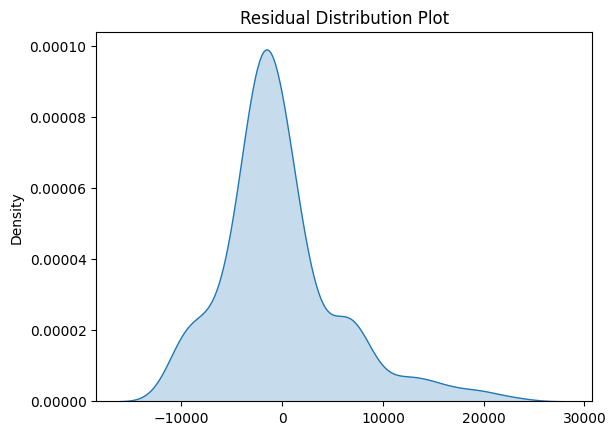

In [20]:
evaluate_model(reg_model, X_test, y_test)

# KNN Model

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsRegressor()

Actual Cost : $ 4463.21
Predicted Cost : $ 7680.63


Mean Absolute Error : $ 3599.65
R2 Score : 0.79




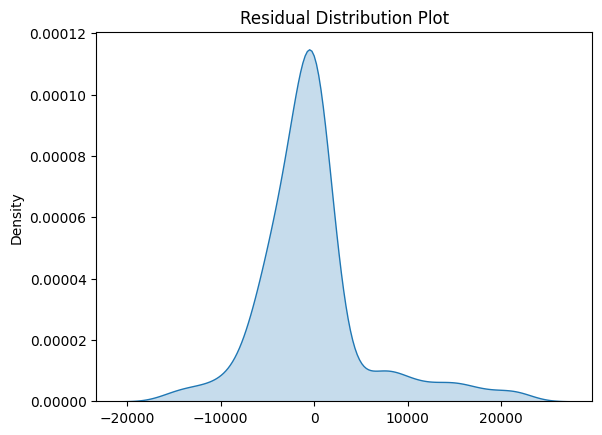

In [22]:
y_pred_knn = knn_model.predict(X_test)
evaluate_model(knn_model , X_test, y_test)

# Random Forest Regressor Model

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Actual Cost : $ 34672.15
Predicted Cost : $ 39099.56


Mean Absolute Error : $ 2561.50
R2 Score : 0.86




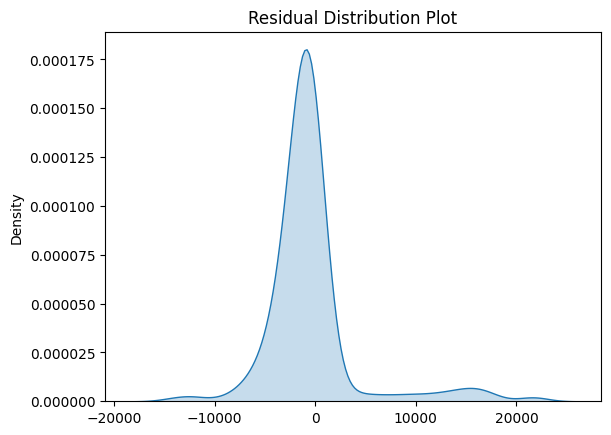

In [24]:
evaluate_model(rf_model,X_test,y_test)

# Artificial Neural Network (ANN) Model

### Helper functions to evaluate the ANN models

In [25]:
def evaluate_ann_model(model,X_test,y_test):
    """Picks any random data(cost) from the given y_test,
    and displays the corroesponding cost prediction made by the ANN model
    
    and,
    
    Evaluates the model on the basis of:
    1.Mean Absolute Error (MAE)
    2.R2 Score
    3.Residual Distribution plot (KDE plot)
    
    input: Model, test features and test labels"""
    y_pred = np.squeeze(model.predict(X_test))
    random_index = random.randint(0,y_pred.size)
    print(f"Actual Cost : $ {y_test[random_index]:.2f}")
    print(f"Predicted Cost : $ {y_pred[random_index]:.2f}")
    mae = mean_absolute_error(y_test,y_pred)
    print("\n")
    print(f"Mean Absolute Error : $ {mae:.2f}")
    r2 = r2_score(y_test,y_pred)
    print(f'R2 Score : {r2:.2f}')
    print("\n")
    residual = y_test - y_pred
    sns.kdeplot(residual,fill=True)
    plt.title('Residual Distribution Plot')
    
def plot_loss_curves(history):
    """Plots the loss curves (Training loss and Validation loss) for the input history object of the model;
    """
    #Training loss curve
    plt.title('Training loss curve')
    plt.plot(pd.DataFrame(history.history['loss']), label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss values')
    plt.legend()
    plt.show()
    
    #Validation loss curve
    plt.title('Validation loss curve')
    plt.plot(pd.DataFrame(history.history['val_loss']), label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss values')
    plt.legend()
    plt.show()
    

In [26]:
# Creating an additional validation set, which would help us monitor the performace of ANN model during training.
X_test_ann, X_valid_ann, y_test_ann, y_valid_ann = train_test_split(X_test, y_test, random_state=42 , test_size=0.2)


In [27]:
# setting the random seed for reproducibility
tf.random.set_seed(42)

ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(125,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(75,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(1)
])
ann_model.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(0.001),
               metrics=['mae'])

history_ann = ann_model.fit(X_train, y_train, epochs=250 , verbose=0 ,validation_data=(X_valid_ann,y_valid_ann)) 
# you can change verbose=1, if you want the training stats to be displayed...

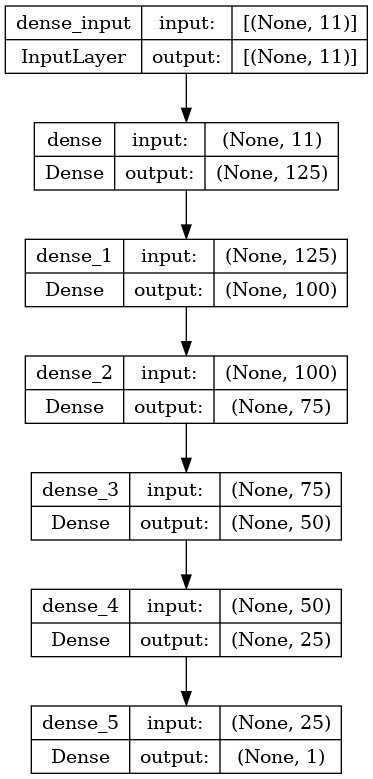

In [28]:
# Architecture of the ANN model created above
from tensorflow.keras.utils import plot_model
plot_model(ann_model,show_shapes=True)

In [29]:
# Summary of the ANN model
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 125)               1500      
                                                                 
 dense_1 (Dense)             (None, 100)               12600     
                                                                 
 dense_2 (Dense)             (None, 75)                7575      
                                                                 
 dense_3 (Dense)             (None, 50)                3800      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 26,776
Trainable params: 26,776
Non-traina

7/7 [==============================] - 0s 2ms/step
Actual Cost : $ 10601.63
Predicted Cost : $ 10502.83


Mean Absolute Error : $ 1582.84
R2 Score : 0.86




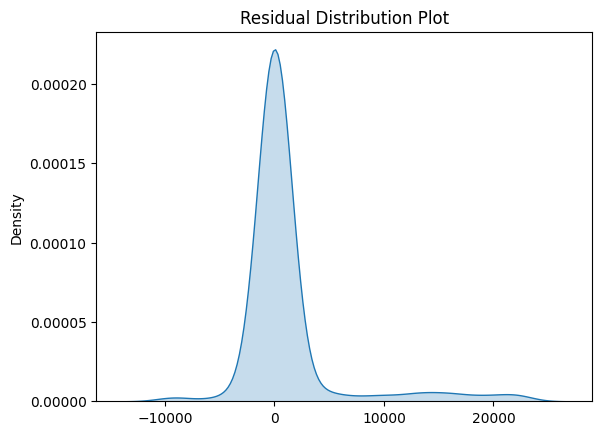

In [33]:
evaluate_ann_model(ann_model, X_test_ann , y_test_ann)

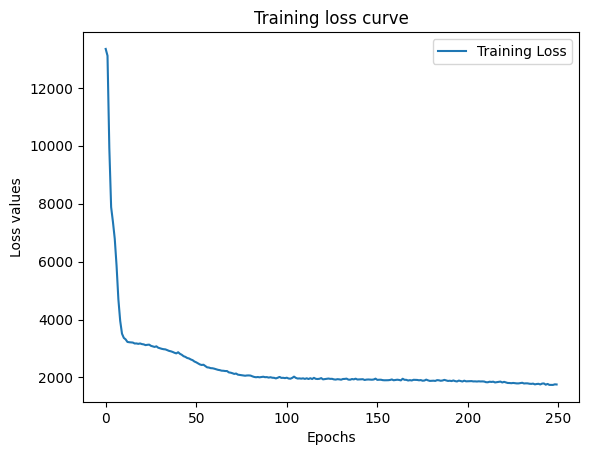

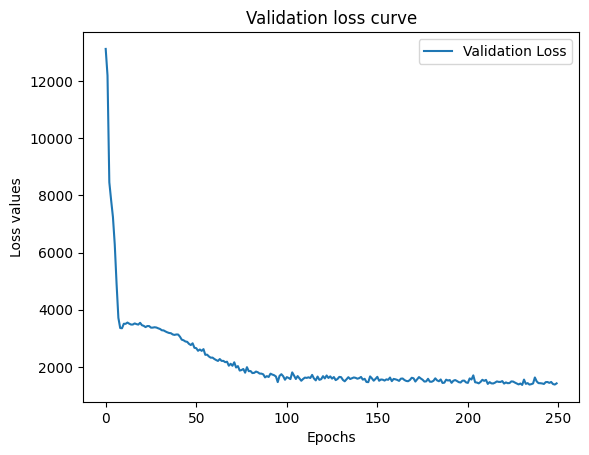

In [31]:
# Plotting the loss curves
plot_loss_curves(history_ann)

### After experimenting for multiple times, by tuning the hyperparameters, increasing/decreasing the layers, it is found that the above ANN model works well.
### Moreover, It doesnt overfit, which can be inferred from the validation loss curve. 
### It has a well distributed bell-shaped Residual curve, and also has less MAE than the other models.

# SUMMARY:

## Linear Regression Model -
* ### Mean Absolute Error (MAE) - $4000 (approx)
* ### R2 Score - 0.76

## KNN Model - 
*  ### Mean Absolute Error (MAE) - $3500 (approx)
* ### R2 Score - 0.79

## Random Forest Model - 
* ### Mean Absolute Error (MAE) - $2500 (approx)
* ### R2 Score - 0.86

## Artificial Neural Network Model -
* ### Mean Absolute Error (MAE) - $1500 (approx)
* ### R2 Score - 0.87
